<a href="https://colab.research.google.com/github/NellyBealtaine/RecipeChatBot/blob/main/FinalAttest_draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Найти и применить ещё одну методику моделирования, сравнить

## Описать различия в оценках разных методик моделирования

###Настроить вывод блюд по категории

###Подчистить данные в датафрейме. Возможно, найти другой датафрейм или спарсить рецепты с какого-нибудь сайта

###Вывести диаграмму, какой вид овощей модель распознаёт лучше всего

### Написать пояснительную записку

#####Закинуть куда-нибудь


##Критерии оценки итоговой аттестационной работы

Критерий	3 балла	2 балла	1 балл

###Проработка бизнес-задачи проекта (проблематика проекта)	
#####Чётко обозначены бизнес-задача и ход разработки проекта, отражены этапы разработки, применённые методы и инструменты	
#####Недостаточно чётко отражена бизнес-задача проекта	
#####Бизнес-задача не обозначена в проекте. Нет предварительного обоснования проекта
###Понимание данных	
#####Данные собраны в достаточном объёме, описаны и проверены на качество	
#####Данные собраны, но либо в недостаточном объёме, либо не проведён первичный анализ данных	
#####Данных собрано недостаточно, и они плохого качества
###Подготовка данных	
#####Данные очищены, отобраны, приведены в надлежащий формат	
#####Данные либо не очищены, либо не отобраны в достаточном объёме и качестве, либо не приведены в надлежащий формат	
#####Данные не очищены, не отобраны, не приведены в надлежащий формат
###Моделирование	
#####Выбраны несколько методик моделирования, сделаны тесты моделей, проведена оценка работы моделей	
#####Выбрана одна методика моделирования, либо не сделаны тесты моделей, либо не проведена оценка работы моделей	
#####В проекте отсутствует применение алгоритмов машинного обучения
###Оценка	
#####Проведена интерпретация результатов оценки, сделан обзор получившегося процесса, обозначены последующие шаги по совершенствованию модели	
#####Либо интерпретация результатов оценки не проведена, либо не сделан обзор получившегося процесса, либо не обозначены последующие шаги по совершенствованию модели	
#####Интерпретация результатов оценки не проведена, не сделан обзор получившегося процесса, не обозначены последующие шаги по совершенствованию модели
###Развёртывание	
#####Развёртывание выполнено либо в виде репозитория, либо в виде облачного приложения	
#####Представлено описание того, как будет выполнено развёртывание	
#####Этап развёртывания никак не отражён в представляемом проекте

###Проект представляет собой телеграм бота, который распознает на присланной фотографии фрукт или овощ и присылает три рецепта блюд, содержащих распознанный продукт.

Данная программа может пригодиться в ситуации, когда, к примеру, человек стоит в магазине перед товарами и думает, что ему приготовить сегодня на ужиин. Он фотографирует лежащий перед ним овощ или фрукт и получает несколько подходящих вариантов, и ему не нужно прибегать к помощи поисковика и долго перебирать варианты. Либо человек вообще не знает, что за овощ перед ним, и хочет узнать, что это и как его можно приготовить.

Исходные данные для обучения модели были взяты с сайта kaggle.com. Это набор фотографий овощей и фруктов, рассортированных по названиям. Видов продуктов в наборе не очень много, данный набор я использовала для пилотной версии проекта. В будущем планирую найти или собрать данные с большинством имеющихся в продаже фруктов и овощей для более корректной работы программы. Датасет с рецептами был взят с того же сайта и насчитывает более шести тысяч рецептов, из него были убраны столбцы, не несущие полезной информации для данного проекта.

Обучение модели производилось с помощью библиотеки keras.

##Сделать обучение второй модели и сравнить
##Результаты оценки

В будущем можно улучшить программу до распознавания целого набора продуктов на фотографии и предложения рецептов из данного набора. Для этого понадобится гораздо бОльший набор данных для обучения модели. Для пополнения набора рецептов можно будет спарсить новые варианты с кулинарных сайтов. Также планирую после добавить функцию выбора пользователем типа желаемых блюд.

In [45]:
!pip install Pillow==9.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 4.3 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [1]:
!pip install pyTelegramBotAPI
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
#import PIL
import time
import telebot
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from glob import glob 
import pathlib
import re
from keras.models import load_model
from PIL import Image, ImageOps 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 213 kB 3.9 MB/s 
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.7.1-py3-none-any.whl size=196989 sha256=150efc81d7c1f6fe012eac00c6f5865ea69db00e2c08203fff9531a9492f4c2d
  Stored in directory: /root/.cache/pip/wheels/84/72/5f/8a7b3ca1ef1250002cf3bac48e0c72c5ee5c9596a5b1295dc1
Successfully built pyTelegramBotAPI


In [13]:
np.set_printoptions(suppress=True)
model = load_model('/content/drive/MyDrive/Python/attest/Fruits and Vegetables/#36-class classification using ResNet-101.hdf5')
class_names = open('/content/drive/MyDrive/Python/attest/Fruits and Vegetables/classnames.txt', 'r').readlines()

In [20]:
def image_helper(data):

  prediction = model.predict(data)
  index = np.argmax(prediction)
  class_name = class_names[index]
  confidence_score = prediction[0][index]

  return class_name

In [8]:
recipes = pd.read_csv('/content/drive/MyDrive/Python/attest/allrecipes.csv', encoding='cp1250')
del recipes['n_rater'], recipes['n_reviewer']
recipes

,group,name,rating,summary,process,ingredient
0,breakfast-and-brunch.eggs.breakfast-burritos,Ham and Cheese Breakfast Tortillas,0.0,This is great for a special brunch or even a q...,"prep: 30 mins,total: 30 mins,Servings: 4,Yield...",12 eggs + <U+2153> cup milk + 3 slices cooked ...
1,breakfast-and-brunch.eggs.breakfast-burritos,Freeze-and-Reheat Breakfast Burritos,0.0,This recipe for hearty breakfast burritos is i...,"prep: 30 mins,cook: 24 mins,total: 54 mins,Ser...",1 (12 ounce) package bacon + 10 large eggs + 3...
2,breakfast-and-brunch.eggs.breakfast-burritos,Southwest Breakfast Burritos,0.0,My wife and I love eating Mexican so I came up...,"prep: 50 mins,cook: 15 mins,total: 1 hr 5 mins...",12 eggs + <U+2154> cup milk + ˝ teaspoon salt ...
3,breakfast-and-brunch.eggs.breakfast-burritos,Flannery's Bacon Avocado Burritos,4.5,These hand-held breakfast bundles are quick to...,"prep: 20 mins,cook: 20 mins,total: 40 mins,Ser...","1 tablespoon butter, divided + 1 cup diced red..."
4,breakfast-and-brunch.eggs.breakfast-burritos,Air Fryer Mini Breakfast Burritos,4.5,These air-fried mini burritos are great for a ...,"prep: 15 mins,cook: 30 mins,total: 45 mins,Ser...",Ľ cup Mexican-style chorizo + 1 tablespoon bac...
...,...,...,...,...,...,...
6199,world-cuisine.asian.vietnamese,Vietnamese Stir-Fry,4.5,This is a tangy stir-fry with beef and green b...,"prep: 30 mins,cook: 25 mins,additional: 2 hrs,...","Ľ cup olive oil + 4 cloves garlic, minced + 1 ..."
6200,world-cuisine.asian.vietnamese,Dragon Fruit Shake,0.0,Tried this in a Vietnamese restaurant in China...,"prep: 10 mins,total: 10 mins,Servings: 2,Yield...","1 dragon fruit (pitaya) + 2 tangerines, peeled..."
6201,world-cuisine.asian.vietnamese,Day After Thanksgiving Turkey Pho,0.0,With the addition of fragrant spices and rice ...,"prep: 15 mins,cook: 2 hrs 15 mins,total: 2 hrs...",1 whole cardamom pod + 2 whole cloves + 1 star...
6202,world-cuisine.asian.vietnamese,Vegetarian Banh Mi Bowls,0.0,This vegetarian bowl version of the beloved Vi...,"prep: 10 mins,cook: 30 mins,total: 40 mins,Ser...",3 quarts water + ˝ (14 ounce) package boil-in-...


In [10]:
def recipe(ingredient):

  ingredient = str(ingredient)
  id = []
  for i in range(len(recipes['ingredient'])):
    result = str(recipes['ingredient'][i]).find(ingredient)
    if result != -1:
      id.append(i)

  n = 3
  res = recipes.iloc[id, :].sort_values('rating', ascending=False).head(n)
  r = ''
  for i in range(n):
    for j in range(len(recipes.iloc[0])):
      r = r + str(res.iloc[i,j]) + '\n'
    r = r + '\n'  
    
  return r

In [11]:
from botconfig import TOKEN

In [ ]:
bot = telebot.TeleBot(TOKEN)

@bot.message_handler(content_types=["photo"])
def photografio(message):
  file = bot.get_file(message.photo[-1].file_id)
  bot.send_message(message.from_user.id, 'Минуту, распознаю, что на фото!')
  dfile = bot.download_file(file.file_path)
  fimg = message.photo[-1].file_id + '.png'
  with open(fimg, 'wb') as new_file:
    new_file.write(dfile)
  new_file.close()

  image = Image.open(fimg).convert('RGB')
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
  image_array = np.asarray(image)
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  data[0] = normalized_image_array

  answer = image_helper(data)

  print('Отправлено')
  print(answer)
  bot.send_message(message.from_user.id, answer)

  time.sleep(3)
  ingredient = ''.join(re.findall('[a-z]', answer))  # можно убрать обработку, классы уже без номеров
  print(ingredient)
  print(type(ingredient))
  recipes_recommendation = recipe(ingredient)
  print(recipes_recommendation)
  bot.send_message(message.from_user.id, recipes_recommendation)

bot.infinity_polling()

#Обучение модели на основе датасета с фотографиями

/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_2.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_5.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_10.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_9.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_8.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_4.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_1.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_6.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_3.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/spinach/Image_7.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/ginger/Image_7.jpg
/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test/ginger/Image

49/49 [==============================] - 813s 16s/step - loss: 18.7283 - accuracy: 0.3876 - val_loss: 0.9538 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 2/30
49/49 [==============================] - ETA: 0s - loss: 2.0206 - accuracy: 0.5457 
Epoch 2: val_accuracy improved from 0.69231 to 0.75783, saving model to checkpoint/


49/49 [==============================] - 742s 15s/step - loss: 2.0206 - accuracy: 0.5457 - val_loss: 0.9037 - val_accuracy: 0.7578 - lr: 0.0010
Epoch 3/30
49/49 [==============================] - ETA: 0s - loss: 1.7457 - accuracy: 0.6047 
Epoch 3: val_accuracy improved from 0.75783 to 0.78348, saving model to checkpoint/


49/49 [==============================] - 748s 15s/step - loss: 1.7457 - accuracy: 0.6047 - val_loss: 0.7515 - val_accuracy: 0.7835 - lr: 0.0010
Epoch 4/30
49/49 [==============================] - ETA: 0s - loss: 1.4142 - accuracy: 0.6660 
Epoch 4: val_accuracy improved from 0.78348 to 0.83191, saving model to checkpoint/


49/49 [==============================] - 759s 15s/step - loss: 1.4142 - accuracy: 0.6660 - val_loss: 0.5785 - val_accuracy: 0.8319 - lr: 0.0010
Epoch 5/30
49/49 [==============================] - ETA: 0s - loss: 1.3452 - accuracy: 0.6805 
Epoch 5: val_accuracy did not improve from 0.83191
49/49 [==============================] - 712s 15s/step - loss: 1.3452 - accuracy: 0.6805 - val_loss: 0.6977 - val_accuracy: 0.8063 - lr: 0.0010
Epoch 6/30
49/49 [==============================] - ETA: 0s - loss: 1.2994 - accuracy: 0.6971 
Epoch 6: val_accuracy improved from 0.83191 to 0.86040, saving model to checkpoint/


49/49 [==============================] - 734s 15s/step - loss: 1.2994 - accuracy: 0.6971 - val_loss: 0.6110 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 7/30
49/49 [==============================] - ETA: 0s - loss: 1.2543 - accuracy: 0.7180 
Epoch 7: val_accuracy did not improve from 0.86040
49/49 [==============================] - 712s 15s/step - loss: 1.2543 - accuracy: 0.7180 - val_loss: 0.7652 - val_accuracy: 0.8319 - lr: 0.0010
Epoch 8/30
49/49 [==============================] - ETA: 0s - loss: 1.0486 - accuracy: 0.7456 
Epoch 8: val_accuracy did not improve from 0.86040
49/49 [==============================] - 722s 15s/step - loss: 1.0486 - accuracy: 0.7456 - val_loss: 0.6597 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 9/30
49/49 [==============================] - ETA: 0s - loss: 0.9529 - accuracy: 0.7658 
Epoch 9: val_accuracy improved from 0.86040 to 0.87179, saving model to checkpoint/


49/49 [==============================] - 750s 15s/step - loss: 0.9529 - accuracy: 0.7658 - val_loss: 0.6101 - val_accuracy: 0.8718 - lr: 0.0010
Epoch 10/30
49/49 [==============================] - ETA: 0s - loss: 1.0069 - accuracy: 0.7764 
Epoch 10: val_accuracy did not improve from 0.87179
49/49 [==============================] - 707s 14s/step - loss: 1.0069 - accuracy: 0.7764 - val_loss: 0.6957 - val_accuracy: 0.8462 - lr: 0.0010
Epoch 11/30
49/49 [==============================] - ETA: 0s - loss: 0.8484 - accuracy: 0.7899 
Epoch 11: val_accuracy improved from 0.87179 to 0.89744, saving model to checkpoint/


49/49 [==============================] - 742s 15s/step - loss: 0.8484 - accuracy: 0.7899 - val_loss: 0.4334 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 12/30
49/49 [==============================] - ETA: 0s - loss: 0.8502 - accuracy: 0.8062 
Epoch 12: val_accuracy did not improve from 0.89744
49/49 [==============================] - 709s 14s/step - loss: 0.8502 - accuracy: 0.8062 - val_loss: 0.5280 - val_accuracy: 0.8860 - lr: 0.0010
Epoch 13/30
49/49 [==============================] - ETA: 0s - loss: 0.8248 - accuracy: 0.8043 
Epoch 13: val_accuracy did not improve from 0.89744
49/49 [==============================] - 716s 15s/step - loss: 0.8248 - accuracy: 0.8043 - val_loss: 0.5071 - val_accuracy: 0.8946 - lr: 0.0010
Epoch 14/30
49/49 [==============================] - ETA: 0s - loss: 0.8757 - accuracy: 0.7950 
Epoch 14: val_accuracy improved from 0.89744 to 0.90313, saving model to checkpoint/


49/49 [==============================] - 737s 15s/step - loss: 0.8757 - accuracy: 0.7950 - val_loss: 0.4756 - val_accuracy: 0.9031 - lr: 0.0010
Epoch 15/30
49/49 [==============================] - ETA: 0s - loss: 0.7373 - accuracy: 0.8098 
Epoch 15: val_accuracy did not improve from 0.90313
49/49 [==============================] - 696s 14s/step - loss: 0.7373 - accuracy: 0.8098 - val_loss: 0.4200 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 16/30
49/49 [==============================] - ETA: 0s - loss: 0.6778 - accuracy: 0.8226 
Epoch 16: val_accuracy did not improve from 0.90313
49/49 [==============================] - 714s 15s/step - loss: 0.6778 - accuracy: 0.8226 - val_loss: 0.4512 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 17/30
49/49 [==============================] - ETA: 0s - loss: 0.6717 - accuracy: 0.8261 
Epoch 17: val_accuracy improved from 0.90313 to 0.91168, saving model to checkpoint/


49/49 [==============================] - 733s 15s/step - loss: 0.6717 - accuracy: 0.8261 - val_loss: 0.4675 - val_accuracy: 0.9117 - lr: 0.0010
Epoch 18/30
49/49 [==============================] - ETA: 0s - loss: 0.6212 - accuracy: 0.8322 
Epoch 18: val_accuracy improved from 0.91168 to 0.91453, saving model to checkpoint/


49/49 [==============================] - 731s 15s/step - loss: 0.6212 - accuracy: 0.8322 - val_loss: 0.4463 - val_accuracy: 0.9145 - lr: 0.0010
Epoch 19/30
49/49 [==============================] - ETA: 0s - loss: 0.6500 - accuracy: 0.8345 
Epoch 19: val_accuracy did not improve from 0.91453
49/49 [==============================] - 707s 14s/step - loss: 0.6500 - accuracy: 0.8345 - val_loss: 0.3211 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 20/30
49/49 [==============================] - ETA: 0s - loss: 0.5566 - accuracy: 0.8463 
Epoch 20: val_accuracy improved from 0.91453 to 0.91738, saving model to checkpoint/


49/49 [==============================] - 731s 15s/step - loss: 0.5566 - accuracy: 0.8463 - val_loss: 0.4574 - val_accuracy: 0.9174 - lr: 0.0010
Epoch 21/30
49/49 [==============================] - ETA: 0s - loss: 0.6074 - accuracy: 0.8447 
Epoch 21: val_accuracy did not improve from 0.91738
49/49 [==============================] - 710s 15s/step - loss: 0.6074 - accuracy: 0.8447 - val_loss: 0.3949 - val_accuracy: 0.9117 - lr: 0.0010
Epoch 22/30
49/49 [==============================] - ETA: 0s - loss: 0.5638 - accuracy: 0.8495 
Epoch 22: val_accuracy improved from 0.91738 to 0.93162, saving model to checkpoint/


49/49 [==============================] - 735s 15s/step - loss: 0.5638 - accuracy: 0.8495 - val_loss: 0.3184 - val_accuracy: 0.9316 - lr: 0.0010
Epoch 23/30
49/49 [==============================] - ETA: 0s - loss: 0.4953 - accuracy: 0.8697 
Epoch 23: val_accuracy did not improve from 0.93162
49/49 [==============================] - 710s 15s/step - loss: 0.4953 - accuracy: 0.8697 - val_loss: 0.3338 - val_accuracy: 0.9288 - lr: 0.0010
Epoch 24/30
49/49 [==============================] - ETA: 0s - loss: 0.5169 - accuracy: 0.8585 
Epoch 24: val_accuracy did not improve from 0.93162
49/49 [==============================] - 705s 14s/step - loss: 0.5169 - accuracy: 0.8585 - val_loss: 0.5908 - val_accuracy: 0.9202 - lr: 0.0010
Epoch 25/30
49/49 [==============================] - ETA: 0s - loss: 0.5565 - accuracy: 0.8598 
Epoch 25: val_accuracy did not improve from 0.93162
49/49 [==============================] - 707s 14s/step - loss: 0.5565 - accuracy: 0.8598 - val_loss: 0.3916 - val_accuracy: 

49/49 [==============================] - 736s 15s/step - loss: 0.4913 - accuracy: 0.8717 - val_loss: 0.4025 - val_accuracy: 0.9402 - lr: 0.0010
Epoch 28/30
49/49 [==============================] - ETA: 0s - loss: 0.4218 - accuracy: 0.8884 
Epoch 28: val_accuracy did not improve from 0.94017
49/49 [==============================] - 717s 15s/step - loss: 0.4218 - accuracy: 0.8884 - val_loss: 0.4879 - val_accuracy: 0.9259 - lr: 0.0010
Epoch 29/30
49/49 [==============================] - ETA: 0s - loss: 0.4312 - accuracy: 0.8957 
Epoch 29: val_accuracy did not improve from 0.94017
49/49 [==============================] - 721s 15s/step - loss: 0.4312 - accuracy: 0.8957 - val_loss: 0.3772 - val_accuracy: 0.9174 - lr: 0.0010
Epoch 30/30
49/49 [==============================] - ETA: 0s - loss: 0.4465 - accuracy: 0.8864 
Epoch 30: val_accuracy did not improve from 0.94017
6/6 [==============================] - 110s 19s/step - loss: 0.3080 - accuracy: 0.9220
test_loss, test accuracy [0.308029145

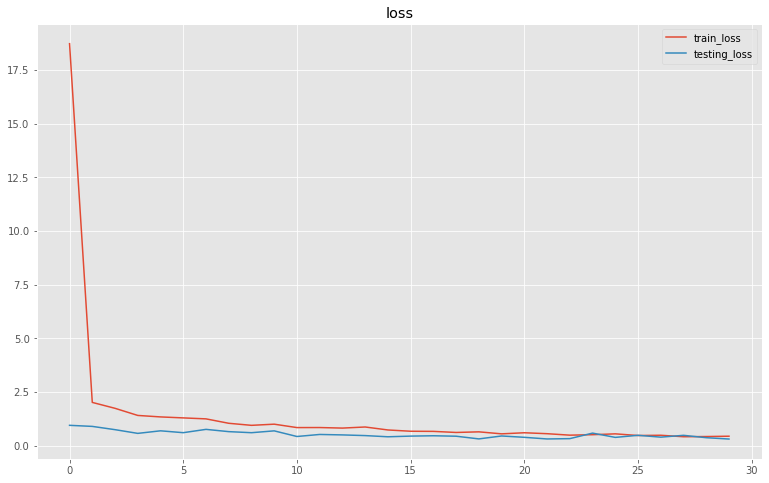

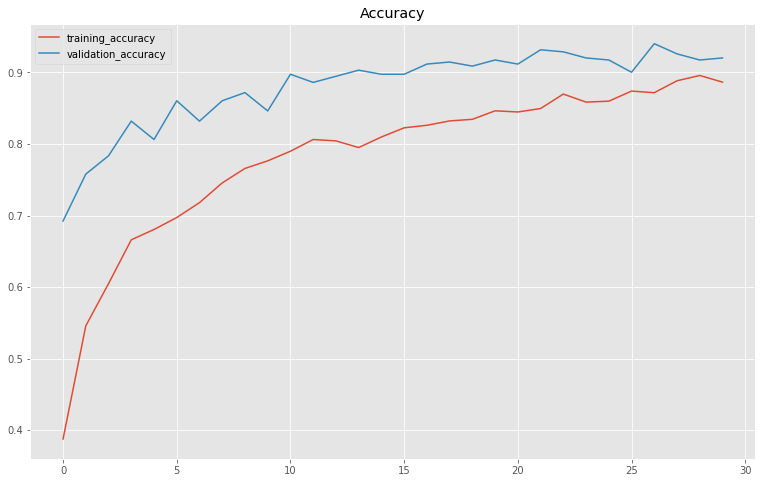

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Python/attest/Fruits and Vegetables'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

train_set = '/content/drive/MyDrive/Python/attest/Fruits and Vegetables/train'
valid_set = '/content/drive/MyDrive/Python/attest/Fruits and Vegetables/validation'
test_set = '/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test'

def get_subdirname(path):
    return [name for name in os.listdir(path) 
            if os.path.isdir(os.path.join(path, name))]

class_names = get_subdirname(train_set)
class_names

train_datagen = ImageDataGenerator(rescale=1/255.,
                                  horizontal_flip=True,
                                  shear_range=True,
                                  rotation_range=40,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2
                                )
train_data = train_datagen.flow_from_directory(train_set,
                                                target_size=(224, 224),
                                                batch_size=64,
                                                class_mode='categorical')

valid_datagen = ImageDataGenerator(rescale=1/255.)

valid_data = valid_datagen.flow_from_directory(valid_set,
                                                target_size=(224, 224),
                                                batch_size=64,
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1/255.)

test_data = test_datagen.flow_from_directory(test_set,
                                                target_size=(224, 224),
                                                batch_size=64,
                                                class_mode='categorical')

from keras.applications.resnet_v2 import ResNet101V2
from keras.models import Model

resnet_v2 = ResNet101V2(weights='imagenet',include_top=False,input_shape=(224,224,3))

for layer in resnet_v2.layers:
    layer.trainable = False

base_model = resnet_v2.output
base_model = Flatten()(base_model)
base_model = Dense(512,activation='relu')(base_model)
base_model = Dense(512,activation='relu')(base_model)
base_model = Dense(36,activation='softmax')(base_model)

model = Model(inputs=resnet_v2.input,outputs=base_model)
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics='accuracy')

model.summary()

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

es = EarlyStopping(monitor='val_accuracy',patience=90,verbose=1,mode='max')
mc = ModelCheckpoint('checkpoint/',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)
lr = ReduceLROnPlateau(monitor='val_accuracy',factor=0.1,min_lr=0.001,patience=15,mode='max',verbose=1)

r = model.fit(train_data,
              epochs= 30,
              batch_size=32,
              validation_data=valid_data,
              callbacks=[es,mc,lr])

result = model.evaluate(test_data,batch_size=64)
print("test_loss, test accuracy",result)

# plotting the loss
plt.figure(figsize=(13, 8))
plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()

# plotting the loss
plt.figure(figsize=(13, 8))
plt.plot(r.history['accuracy'],label = 'training_accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

model.save("#36-class classification using ResNet-101.hdf5")

In [ ]:
class_map = train_data.class_indices
labels = list(class_map.keys())

In [ ]:
labels

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
classes_file = open ('/content/drive/MyDrive/Python/attest/Fruits and Vegetables/classnames.txt', 'w') 
for element in labels:
     classes_file.write(element)
     classes_file.write('\n')
classes_file.close ()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import torch
import torchvision
import torchvision.transforms as T
from torch import nn

import warnings
import gc
import os
import shutil
import time
from tqdm import tqdm
from IPython.display import clear_output

from collections import defaultdict

sns.set(font_scale=1.2)
warnings.filterwarnings('ignore')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

np.random.seed(12)
torch.manual_seed(12)

DATA_DIR = '/content/drive/MyDrive/Python/attest/Fruits and Vegetables/'
WORKING_DIR = '/content/drive/MyDrive/Python/attest/Fruits and Vegetables/working_dir/'
TRAIN_DIR = os.path.join(WORKING_DIR, 'train')
VAL_DIR = os.path.join(WORKING_DIR, 'validation')
READ_TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')

IS_TRAIN = True
WITH_VALIDATION = False

# creating directories for train and validation
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)
CATEGORIES = {i: name for i, name in enumerate(os.listdir(READ_TRAIN_DIR))}
VAL_PART = 0.2 if WITH_VALIDATION else 0.0

# dividing the training sample into training and validation samples
images_nums = {}
for category in CATEGORIES.values():
    # preparing training and validation directories in working directory
    train_category_dir = os.path.join(TRAIN_DIR, category)
    val_category_dir = os.path.join(VAL_DIR, category)
    
#    shutil.rmtree(val_category_dir, ignore_errors=True)
#    shutil.rmtree(train_category_dir, ignore_errors=True)
    os.makedirs(val_category_dir, exist_ok=True)
#    shutil.copytree(os.path.join(READ_TRAIN_DIR, category), train_category_dir)
    
    # generating numbers of images for validation
    images_names = sorted(os.listdir(train_category_dir))
    images_num = len(images_names)
    val_images_num = int(images_num * VAL_PART)
    val_images_names = np.take(images_names, np.random.choice(images_num, val_images_num, replace=False))
    images_nums[category] = images_num
    
    # copy needed images to validation directory and remove them from training directiry
    for image_name in val_images_names:
        cur_image = os.path.join(train_category_dir, image_name)
        shutil.copy(cur_image, os.path.join(os.path.join(VAL_DIR, category), image_name))
        os.remove(cur_image)
    
    print(f'{category}: train_images = {images_num - val_images_num}, val_images = {val_images_num}')
weights = [100.0 / images_nums[category] for category in CATEGORIES.values()]
IMG_SIZE = (224, 224)

# augumentations
train_transforms = T.Compose([
    T.Resize(IMG_SIZE),
    T.RandomAffine(20),
    T.RandomHorizontalFlip(),
    T.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.2)),
    T.ToTensor(),
    T.Lambda(lambda x: x[:3])
])

val_transforms = T.Compose([
    T.Resize(IMG_SIZE),
    T.ToTensor(),
    T.Lambda(lambda x: x[:3])
])
batch_size = 64

train_dataset = torchvision.datasets.ImageFolder(TRAIN_DIR, transform=train_transforms)
train_batch_gen = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
if WITH_VALIDATION:
    val_dataset = torchvision.datasets.ImageFolder(VAL_DIR, transform=val_transforms)
    val_batch_gen = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
else:
    val_batch_gen = None
class VGGBlock(nn.Module):
    def __init__(self, layers_number, in_channels, out_channels):
        super().__init__()
        self.layers = nn.Sequential()
        self.layers.add_module(module=nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), name='conv1')
        self.layers.add_module(module=nn.BatchNorm2d(out_channels), name='bn1')
        self.layers.add_module(module=nn.ReLU(), name='relu1')
        for i in range(layers_number - 1):
            self.layers.add_module(module=nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
                                   name=f'conv{i + 2}')
            self.layers.add_module(module=nn.BatchNorm2d(out_channels), name=f'bn{i + 2}')
            self.layers.add_module(module=nn.ReLU(), name=f'relu{i + 2}')
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        return self.pool(self.layers(x))
class VGGModel(nn.Module):
    def __init__(self, classes_number):
        super().__init__()
        self.classes_number = classes_number
        layers_structure = ((2, 3, 64), (2, 64, 128), (4, 128, 256), (4, 256, 512), (4, 512, 512))
        
        self.vgg_blocks = nn.Sequential()
        for i, layer_structure in enumerate(layers_structure):
            self.vgg_blocks.add_module(module=VGGBlock(*layer_structure), name=f'vgg{i + 1}')
            
        self.fltn = nn.Flatten()
        
        self.fc1 = nn.Linear(7 * 7 * 512, 4096)
        self.bn1 = nn.BatchNorm1d(4096)
        self.act1 = nn.ReLU()
        self.do1 = nn.Dropout()
        
        self.fc2 = nn.Linear(4096, 4096)
        self.bn2 = nn.BatchNorm1d(4096)
        self.act2 = nn.ReLU()
        self.do2 = nn.Dropout()
        
        self.fc3 = nn.Linear(4096, classes_number)
        
    def forward(self, x):
        x = self.fltn(self.vgg_blocks(x))
        
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.do1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.do2(x)
        
        return self.fc3(x)
classes_number = len(CATEGORIES)
model = VGGModel(classes_number).to(device)
criterion = nn.CrossEntropyLoss(weight=torch.FloatTensor(weights).to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-6)
if WITH_VALIDATION:
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', threshold=0.01, factor=0.31, patience=7)
else:
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[20,35], gamma=0.31)
def plot_learning_curves(history):
    fig = plt.figure(figsize=(20, 7))

    plt.subplot(1,2,1)
    plt.title('Loss', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    
    if 'val' in history['loss'].keys():
        plt.plot(history['loss']['val'], label='val')
        
    plt.ylabel('loss', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Accuracy', fontsize=15)
    plt.plot(history['accuracy']['train'], label='train')
    
    if 'val' in history['accuracy'].keys():
        plt.plot(history['accuracy']['val'], label='val')
        
    plt.ylabel('accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()
    plt.show()
def train(
    model, 
    criterion,
    optimizer, 
    train_batch_gen,
    val_batch_gen=None,
    num_epochs=50,
    scheduler=None,
    history=None,
    checkpoint_path='state.pt',
):
    if history is None:
        history = defaultdict(lambda: defaultdict(list))

    for epoch in range(num_epochs):
        train_loss = 0
        train_accuracy = 0
        val_loss = 0
        val_accuracy = 0
        
        start_time = time.time()

        model.train(True) 

        for X_batch, y_batch in tqdm(train_batch_gen, leave=False):
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            logits = model(X_batch)
            
            loss = criterion(logits, y_batch.long().to(device))

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss += np.sum(loss.detach().cpu().numpy())
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            train_accuracy += np.mean(y_batch.cpu().numpy() == y_pred)

        train_loss /= len(train_batch_gen)
        train_accuracy /= len(train_batch_gen) 
        history['loss']['train'].append(train_loss)
        history['accuracy']['train'].append(train_accuracy)
        
        if val_batch_gen is not None:
            model.train(False)

            with torch.no_grad():
                for X_batch, y_batch in tqdm(val_batch_gen, leave=False):
                    X_batch = X_batch.to(device)
                    y_batch = y_batch.to(device)
                
                    logits = model(X_batch)
                    loss = criterion(logits, y_batch.long().to(device))
                    val_loss += np.sum(loss.detach().cpu().numpy())
                    y_pred = logits.max(1)[1].detach().cpu().numpy()
                    val_accuracy += np.mean(y_batch.cpu().numpy() == y_pred)

            val_loss /= len(val_batch_gen)
            val_accuracy /= len(val_batch_gen) 
            history['loss']['val'].append(val_loss)
            history['accuracy']['val'].append(val_accuracy)
        
        clear_output()

        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss: \t\t\t{:.6f}".format(train_loss))
        
        if val_batch_gen is not None:
            print("  validation loss: \t\t\t{:.6f}".format(val_loss))
        
        print("  training accuracy: \t\t\t{:.2f} %".format(train_accuracy * 100))
        
        if val_batch_gen is not None:
            print("  validation accuracy: \t\t\t{:.2f} %".format(val_accuracy * 100))
        
        state_dict = {
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'history': dict(history),
        }
        
        if scheduler is not None:
            if val_batch_gen is None:
                scheduler.step()
            else:
                scheduler.step(val_loss)
            state_dict['scheduler_state_dict'] = scheduler.state_dict()

        plot_learning_curves(history)
        torch.save(state_dict, checkpoint_path)
        gc.collect()
        
    return model, history
checkpoint_path = os.path.join(WORKING_DIR, 'vgg-adam-epoch50.pt')
if IS_TRAIN:
    model, history = train(model, criterion, optimizer, train_batch_gen, val_batch_gen,
                           scheduler=scheduler, checkpoint_path=checkpoint_path)
test_dataset = torchvision.datasets.ImageFolder(TEST_DIR, transform=val_transforms)
test_batch_gen = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
state = torch.load(checkpoint_path)
model.load_state_dict(state['model_state_dict'])

model.eval()

y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_batch_gen:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
                
        logits = model(X_batch)
        y_pred += logits.max(1)[1].detach().cpu().numpy().tolist()
        y_true += y_batch.cpu().numpy().tolist()
        
final_accuracy = accuracy_score(y_pred, y_true)
print('Final test accuracy: {:.2f} %'.format(final_accuracy * 100))


In [4]:
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm
from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_dir = '/content/drive/MyDrive/Python/attest/Fruits and Vegetables/train'
val_dir = '/content/drive/MyDrive/Python/attest/Fruits and Vegetables/validation'
test_dir = '/content/drive/MyDrive/Python/attest/Fruits and Vegetables/test'
classes0 = os.listdir(train_dir)
classes=sorted(classes0)
print(classes)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [6]:
train_transform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(40),              # resize shortest side
        transforms.CenterCrop(40),          # crop longest side
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [7]:
trainset = ImageFolder(train_dir, transform=train_transform)
valset = ImageFolder(val_dir, transform=train_transform)
testset = ImageFolder(test_dir, transform=train_transform)
print(len(trainset))

3115


In [8]:
# view one image shape of the dataset.
img, label = trainset[10]
print(img.shape)

torch.Size([3, 40, 40])


In [9]:
# function for the showing the image.
def show_image(img,label):
    print('Label: ', trainset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Label:  apple (0)


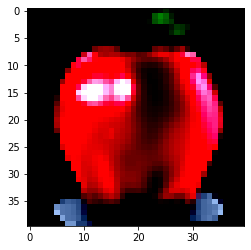

In [10]:
show_image(*trainset[20])

In [11]:
torch.manual_seed(10)
train_size = len(trainset)
val_size = len(valset)
test_size = len(testset)

In [12]:
#train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
train_ds=trainset
val_ds=valset
test_ds=testset
len(train_ds), len(val_ds), len(test_ds)   

(3115, 351, 359)

In [13]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)
#data_loader = DataLoader(dataset, batch_size, shuffle=None, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


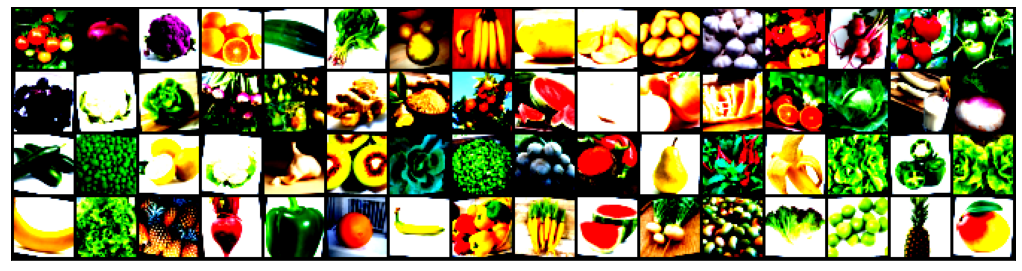

In [14]:
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

In [15]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [16]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [17]:
torch.cuda.is_available()

False

In [18]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [19]:
device = get_default_device()
device

device(type='cpu')

In [20]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)
#data_loader = DeviceDataLoader(data_loader, device)

In [21]:
input_size = 3*40*40
output_size = 3

In [22]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                   # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [23]:
class CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 100, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(100, 150, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(150, 200, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(200, 200, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(200, 250, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(250, 250, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(6250, 256),  
            nn.ReLU(),            
            nn.Linear(256, 128),  
            nn.ReLU(),            
            nn.Linear(128, 64),           
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(32, len(classes)))
        
    def forward(self, xb):
        return self.network(xb)

In [24]:
model = CnnModel()
#model.cuda() #if use cuda

In [25]:
model

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(200, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6250, out_features=256, bias=True)
    (17): ReLU()
    (18): Linear(in_features

In [26]:
for images, labels in train_loader:
    out = model(images)
    print('images.shape:', images.shape)    
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([64, 3, 40, 40])
out.shape: torch.Size([64, 36])
out[0]: tensor([ 0.1336,  0.1231,  0.0451,  0.2295,  0.0848,  0.1640,  0.1751, -0.1716,
        -0.0808,  0.1444, -0.0195, -0.0381,  0.1280, -0.0780, -0.1600,  0.0324,
         0.1877,  0.0307, -0.0708, -0.1685,  0.1805, -0.1946,  0.1698,  0.1024,
         0.1484, -0.1747,  0.0602,  0.0311,  0.1434, -0.0714,  0.0720,  0.0667,
        -0.0919, -0.0133, -0.1381, -0.0177], grad_fn=<SelectBackward0>)


In [27]:
device = get_default_device()
device

device(type='cpu')

In [28]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
test_dl = DeviceDataLoader(test_loader, device)
to_device(model, device)

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(150, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(200, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6250, out_features=256, bias=True)
    (17): ReLU()
    (18): Linear(in_features

In [29]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [30]:
model = to_device(CnnModel(), device)

In [31]:
history=[evaluate(model, val_loader)]
history

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[{'val_loss': 3.58858323097229, 'val_acc': 0.035087719559669495}]

In [33]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.001

In [34]:
history+= fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [0], train_loss: 3.5658, val_loss: 3.5031, val_acc: 0.0742


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [1], train_loss: 3.4464, val_loss: 3.2763, val_acc: 0.0651


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expe

Epoch [2], train_loss: 3.3187, val_loss: 3.1765, val_acc: 0.0618


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [3], train_loss: 3.2425, val_loss: 3.0906, val_acc: 0.0829


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [4], train_loss: 3.1916, val_loss: 2.9437, val_acc: 0.1283


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [5], train_loss: 3.1224, val_loss: 2.7735, val_acc: 0.1647


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [6], train_loss: 3.0007, val_loss: 2.6664, val_acc: 0.1612


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  

Epoch [7], train_loss: 2.9187, val_loss: 2.5667, val_acc: 0.2005


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [8], train_loss: 2.8318, val_loss: 2.5368, val_acc: 0.2187


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [9], train_loss: 2.7564, val_loss: 2.3179, val_acc: 0.2475


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [10], train_loss: 2.6493, val_loss: 2.2076, val_acc: 0.2614


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [11], train_loss: 2.5392, val_loss: 2.0615, val_acc: 0.3078


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [12], train_loss: 2.4952, val_loss: 2.0829, val_acc: 0.2854


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expe

Epoch [13], train_loss: 2.4107, val_loss: 1.9134, val_acc: 0.3556


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [14], train_loss: 2.3046, val_loss: 1.7472, val_acc: 0.4018


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [15], train_loss: 2.2716, val_loss: 1.7102, val_acc: 0.4044


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [16], train_loss: 2.2347, val_loss: 1.6622, val_acc: 0.4350


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [17], train_loss: 2.1734, val_loss: 1.5791, val_acc: 0.4678


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [18], train_loss: 2.1261, val_loss: 1.6103, val_acc: 0.4609


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  

Epoch [19], train_loss: 2.1010, val_loss: 1.4772, val_acc: 0.5150


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [20], train_loss: 2.0095, val_loss: 1.3838, val_acc: 0.5131


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [21], train_loss: 1.9474, val_loss: 1.4065, val_acc: 0.5331


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Im

Epoch [22], train_loss: 1.9354, val_loss: 1.3346, val_acc: 0.5367


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [23], train_loss: 1.8608, val_loss: 1.3457, val_acc: 0.5383


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  

Epoch [24], train_loss: 1.8884, val_loss: 1.3402, val_acc: 0.5569


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Im

Epoch [25], train_loss: 1.7994, val_loss: 1.2160, val_acc: 0.5820


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

Epoch [26], train_loss: 1.7409, val_loss: 1.1704, val_acc: 0.5828


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [27], train_loss: 1.7391, val_loss: 1.2149, val_acc: 0.5906


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

Epoch [28], train_loss: 1.6188, val_loss: 1.0466, val_acc: 0.6411


  0%|          | 0/49 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expe

Epoch [29], train_loss: 1.6251, val_loss: 1.0561, val_acc: 0.6048


In [35]:
#history+= fit(num_epochs, lr/10, model, train_dl, val_dl, opt_func)

In [36]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.show()
    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()

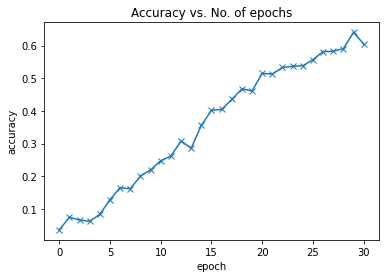

In [37]:
plot_accuracies(history)

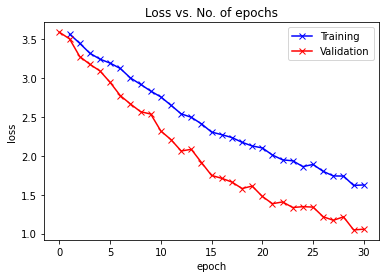

In [38]:
plot_losses(history)

In [39]:
evaluate(model, test_loader)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


{'val_loss': 1.0709590911865234, 'val_acc': 0.6113218069076538}

In [40]:
y_true=[]
y_pred=[]
with torch.no_grad():
    for test_data in test_loader:
        test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
        pred = model(test_images).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=classes,digits=4))

               precision    recall  f1-score   support

        apple     0.5714    0.4000    0.4706        10
       banana     0.8750    0.7778    0.8235         9
     beetroot     0.7143    1.0000    0.8333        10
  bell pepper     0.0000    0.0000    0.0000        10
      cabbage     1.0000    0.2000    0.3333        10
     capsicum     0.3000    0.3000    0.3000        10
       carrot     0.9000    0.9000    0.9000        10
  cauliflower     0.9000    0.9000    0.9000        10
chilli pepper     0.2000    0.5000    0.2857        10
         corn     0.0000    0.0000    0.0000        10
     cucumber     0.3333    0.3000    0.3158        10
     eggplant     0.9091    1.0000    0.9524        10
       garlic     1.0000    1.0000    1.0000        10
       ginger     0.5556    0.5000    0.5263        10
       grapes     1.0000    0.7000    0.8235        10
     jalepeno     0.8333    0.5000    0.6250        10
         kiwi     1.0000    1.0000    1.0000        10
        l

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('pytorch_model.pt') # Save

In [5]:
model = torch.jit.load('pytorch_model.pt')
#model.eval()

RecursiveScriptModule(
  original_name=CnnModel
  (network): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Conv2d)
    (1): RecursiveScriptModule(original_name=ReLU)
    (2): RecursiveScriptModule(original_name=Conv2d)
    (3): RecursiveScriptModule(original_name=ReLU)
    (4): RecursiveScriptModule(original_name=MaxPool2d)
    (5): RecursiveScriptModule(original_name=Conv2d)
    (6): RecursiveScriptModule(original_name=ReLU)
    (7): RecursiveScriptModule(original_name=Conv2d)
    (8): RecursiveScriptModule(original_name=ReLU)
    (9): RecursiveScriptModule(original_name=MaxPool2d)
    (10): RecursiveScriptModule(original_name=Conv2d)
    (11): RecursiveScriptModule(original_name=ReLU)
    (12): RecursiveScriptModule(original_name=Conv2d)
    (13): RecursiveScriptModule(original_name=ReLU)
    (14): RecursiveScriptModule(original_name=MaxPool2d)
    (15): RecursiveScriptModule(original_name=Flatten)
    (16): RecursiveScriptModule(ori

In [44]:
classes_file = open ('/content/drive/MyDrive/Python/attest/Fruits and Vegetables/classespt.txt', 'w') 
for element in classes:
     classes_file.write(element)
     classes_file.write('\n')
classes_file.close ()

In [6]:
class_names = open('/content/drive/MyDrive/Python/attest/Fruits and Vegetables/classespt.txt', 'r').readlines()

In [17]:
def predict(self, test_images):
    self.eval()
    # model is self(VGG class's object)
    
    count = test_images.shape[0]
    result_np = []
        
    for idx in range(0, count):
        # print(idx)
        img = test_images[idx, :, :, :]
        img = np.expand_dims(img, axis=0)
        img = torch.Tensor(img).permute(0, 3, 1, 2).to(device)
        # print(img.shape)
        pred = self(img)
        pred_np = pred.cpu().detach().numpy()
        for elem in pred_np:
            result_np.append(elem)
    return result_np